# **CI Course - EX5**

--------

--------


## Theory Overview ##

**Fuzzy control systems:**

A fuzzy control system is a type of control system that uses fuzzy logic instead of traditional Boolean logic.<br/> It is particularly useful in situations where the input and output variables are not easily quantifiable or where the system being controlled is too complex for traditional methods.<br/> Fuzzy control systems are commonly used in a wide range of applications, from consumer electronics to industrial automation.


![fuzzy_logic_control_architecture](assets/fuzzy_logic_control_architecture.jpg)

A fuzzy control system converts precise inputs into fuzzy values through fuzzification, processes these values using rule-based inference, and then converts them back to precise outputs through defuzzification. The system has five main components:

1. **Fuzzifier**: Transforms crisp input values from sensors (e.g., temperature and humidity readings) into fuzzy linguistic variables with degrees of membership in fuzzy sets.

2. **Rule Base**: Contains expert knowledge in the form of IF-THEN rules that define the control strategy (e.g., "IF temperature is Hot AND humidity is Wet, THEN fan speed is High").

3. **Inference Engine**: Evaluates all applicable rules and combines their results to determine the fuzzy output distribution.

4. **Defuzzifier**: Converts the fuzzy output back into a crisp, precise value that can control the system (e.g., exact fan speed percentage).

5. **Output Interface**: Applies the defuzzified value to the physical system being controlled.

---


### Exersice - fuzzy fan speed control ###

In this exercise, we will develop a fuzzy control system to control fan speed based on data obtained from temperature and humidity sensors.

There are three solution spaces (universes) : temperature[C], humidity[%], and speed[%], and each space is divided into multiple fuzzy sets with corresponding membership functions.

- The temperature space consists of 'Cold', 'Good', and 'Hot' sets, each with a Gaussian membership function.
- The humidity space consists of 'Dry', 'Acceptable', and 'Wet' sets, each with a triangular membership function.
- The speed space includes 'Low', 'Medium', and 'High' sets, each with a triangular membership function. 

**The goal** is to create a smart heating system that will command the fan to stabilize at a certain speed based on the temperature and humidity readings.

The inference system will be based on **3 rules**:
1. If the Temperature is Hot AND Humidity is Wet, then the fan is High (**2 conditions** with **AND** relation)
2. If the Humidity is Acceptable, then the fan is Medium (**1 condition**)
3. If the Temperature is Good OR the Humidity is Dry, then the fan will be Low (**2 conditions** with **OR** relation)


---


## 🌀 Exercise: Fuzzy Fan-Speed Control

In this exercise, you will build a **fuzzy control system** that adjusts fan speed based on real-time temperature and humidity readings.

---

### 1. Universes of Discourse

- **Temperature (°C)**: range **–10 to +50**  
- **Humidity (%)**: range **0 to 100**  
- **Fan Speed (%)**: range **0 to 100**  

---

### 2. Fuzzy Sets & Membership Functions

| Universe     | Fuzzy Sets                           | MF Type     |
|--------------|--------------------------------------|-------------|
| **Temperature** | Cold, Good, Hot                    | Gaussian    |
| **Humidity**    | Dry, Acceptable, Wet               | Triangular  |
| **Fan Speed**   | Low, Medium, High                  | Triangular  |

> **Tip:**  
> - Gaussian MFs smoothly cover overlapping intervals.  
> - Triangular MFs are simple “peak-and-fade” shapes ideal for crisp boundaries.

---

### 3. Control Objective

> Design a fuzzy inference engine that **stabilizes the fan** at an appropriate speed given sensor inputs.

---

### 4. Inference Rules

1. **Rule 1 (AND)**  
   If **Temperature is Hot** **AND** **Humidity is Wet**,  
   → Fan Speed is **High**  

2. **Rule 2 (Single Condition)**  
   If **Humidity is Acceptable**,  
   → Fan Speed is **Medium**  

3. **Rule 3 (OR)**  
   If **Temperature is Good** **OR** **Humidity is Dry**,  
   → Fan Speed is **Low**  

---

🔧 **Next Steps:**  
1. Define your universes (`x_temp`, `x_humidity`, `x_fan`).  
2. Create the membership functions (`gaussmf`, `trimf`).  
3. Compute rule antecedents (`AND` → `min`, `OR` → `max`).  
4. Aggregate rule outputs and **defuzzify** (e.g. centroid).  
5. Plot membership curves, rule activations, and final crisp output.


### Solution ###

#### Import libraries and "read" the sensors input ####


In [41]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

# What would the fan speed be in the following circumstance:
T = 28
H = 37

####  Defining the fuzzy sets and their corresponding membership functions ####

In [42]:
# Generate universe variables
#   * Temperature in the subjective range [-10, 50] degC
#   * Humidity in the subjective range [0, 100] percent
#   * Fan has a range of [0, 100] percent of speed
x_temp = np.arange(-10, 50, 1) 
x_humidity = np.arange(0, 100, 1) 
x_fan  = np.arange(0, 100, 1)

# Generate fuzzy membership functions (in array,mean,std)
# Temperature with Gaussian membership functions
#   * Cold: 0% to 20%
#   * Good: 20% to 40%
#   * Hot: 40% to 100%
temp_cold = fuzz.gaussmf(x_temp, 10, 5.5)
temp_good = fuzz.gaussmf(x_temp, 21, 5)
temp_hot = fuzz.gaussmf(x_temp, 33, 5.5)
                    #(in array,[left vertex ,center vertex, right vertex])
# Humidity with triangular membership functions
#   * Dry: 0% to 50%
#   * Acceptable: 20% to 80%
#   * Wet: 50% to 100%
humid_dry = fuzz.trimf(x_humidity, [0, 0, 50])
humid_acceptable = fuzz.trimf(x_humidity, [20, 50, 80])
humid_wet = fuzz.trimf(x_humidity, [50, 100, 100])
# Fan with triangular membership functions
#   * Low: 0% to 50%
#   * Medium: 0% to 100%
#   * High: 50% to 100%
fan_lo = fuzz.trimf(x_fan, [0, 0, 50])
fan_md = fuzz.trimf(x_fan, [0, 50, 100])
fan_hi = fuzz.trimf(x_fan, [50, 100, 100])

# plot for membership funcs 

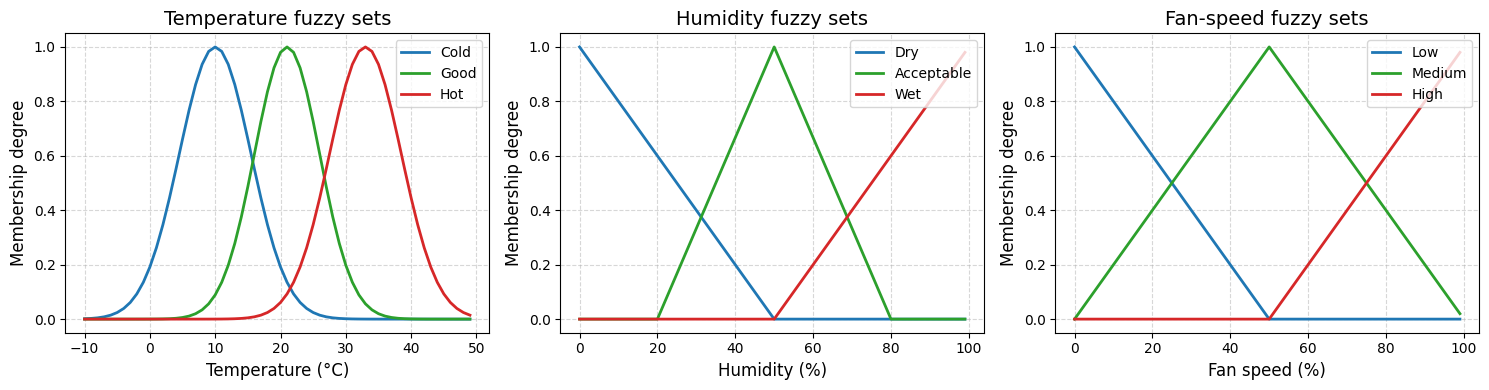

In [ ]:


# 1. Prepare figure with three side-by-side subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# -------------------------------------------------------------------
# Plot 1: Temperature fuzzy sets
# -------------------------------------------------------------------
# Cold
ax1.plot(x_temp, temp_cold,   lw=2, color='#1f77b4', label='Cold')
# Good
ax1.plot(x_temp, temp_good,   lw=2, color='#2ca02c', label='Good')
# Hot
ax1.plot(x_temp, temp_hot,    lw=2, color='#d62728', label='Hot')
# Optional: mark crisp temperature input
# ax1.axvline(T, color='k', ls='--', lw=1.5)

ax1.set_title('Temperature fuzzy sets', fontsize=14)
ax1.set_xlabel('Temperature (°C)', fontsize=12)
ax1.set_ylabel('Membership degree', fontsize=12)
ax1.set_ylim(-0.05, 1.05)
ax1.legend(loc='upper right', framealpha=0.8)
ax1.grid(True, ls='--', alpha=0.5)

# -------------------------------------------------------------------
# Plot 2: Humidity fuzzy sets
# -------------------------------------------------------------------
# Dry
ax2.plot(x_humidity, humid_dry,         lw=2, color='#1f77b4', label='Dry')
# Acceptable
ax2.plot(x_humidity, humid_acceptable,  lw=2, color='#2ca02c', label='Acceptable')
# Wet
ax2.plot(x_humidity, humid_wet,         lw=2, color='#d62728', label='Wet')
# Optional: mark crisp humidity input
# ax2.axvline(H, color='k', ls='--', lw=1.5)

ax2.set_title('Humidity fuzzy sets', fontsize=14)
ax2.set_xlabel('Humidity (%)', fontsize=12)
ax2.set_ylabel('Membership degree', fontsize=12)
ax2.set_ylim(-0.05, 1.05)
ax2.legend(loc='upper right', framealpha=0.8)
ax2.grid(True, ls='--', alpha=0.5)

# -------------------------------------------------------------------
# Plot 3: Fan-speed fuzzy sets
# -------------------------------------------------------------------
# Low
ax3.plot(x_fan, fan_lo,  lw=2, color='#1f77b4', label='Low')
# Medium
ax3.plot(x_fan, fan_md,  lw=2, color='#2ca02c', label='Medium')
# High
ax3.plot(x_fan, fan_hi,  lw=2, color='#d62728', label='High')
# Optional: mark crisp fan-speed result
# ax3.axvline(fan_cog, color='k', ls='--', lw=1.5)

ax3.set_title('Fan-speed fuzzy sets', fontsize=14)
ax3.set_xlabel('Fan speed (%)', fontsize=12)
ax3.set_ylabel('Membership degree', fontsize=12)
ax3.set_ylim(-0.05, 1.05)
ax3.legend(loc='upper right', framealpha=0.8)
ax3.grid(True, ls='--', alpha=0.5)

# -------------------------------------------------------------------
# Final layout adjustments
# -------------------------------------------------------------------
plt.tight_layout()
plt.show()


#### Find the membership values of the inputs ####

In [24]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values T and H do not exist on our universes...
# This is what fuzz.interp_membership exists for! find the fuzzy value in each mem. func.
temp_level_cold = fuzz.interp_membership(x_temp, temp_cold, T)
temp_level_good = fuzz.interp_membership(x_temp, temp_good, T)
temp_level_hot = fuzz.interp_membership(x_temp, temp_hot, T)
print(f"I believe that temprature {T}[C] is : {temp_level_cold:.2f} 'cold' , {temp_level_good:.2f} 'good', {temp_level_hot:.2f} 'high'")

humid_level_dry = fuzz.interp_membership(x_humidity, humid_dry, H)
humid_level_acceptable = fuzz.interp_membership(x_humidity, humid_acceptable, H)
humid_level_wet = fuzz.interp_membership(x_humidity, humid_wet, H)
print(f"I believe that humidity {H}[%] is : {humid_level_dry:.2f} 'dry' , {humid_level_acceptable:.2f} 'acceptable', {humid_level_wet} 'wet'")

I believe that temprature 28[C] is : 0.00 'cold' , 0.38 'good', 0.66 'high'
I believe that humidity 37[%] is : 0.26 'dry' , 0.57 'acceptable', 0.0 'wet'


---

## 1. Crisp Input Memberships

| **Variable**   | **Category**    | **Degree** |
|----------------|-----------------|------------|
| Temperature 28 °C | Cold            | 0.00       |
|                | Good            | 0.38       |
|                | Hot             | 0.66       |
| Humidity 37 %    | Dry             | 0.26       |
|                | Acceptable      | 0.57       |
|                | Wet             | 0.00       |

---


####  Define and calculate the fuzzy rules ####

## Rule 1:  
**IF** Temperature is **Hot** **AND** Humidity is **Wet**  
**THEN** Fan Speed is **High**

- **Rule 1 firing strength:**  
  \- Hot membership = 0.66  
  \- Wet membership = 0.00  
  \- **AND (min)** ⇒ 0.00

- **Resulting “High” fan-speed activation:** **0.00**

---

*Interpretation:*  
Because the humidity membership in **Wet** is zero, Rule 1 does not fire, so the “High” fan-speed set remains inactive.

In [25]:
# The AND operator means we take the minimum of these two.
alpha1 = np.fmin(temp_level_hot, humid_level_wet)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
# This finds the top of the fuzzy patch for high fan
fan_activation_hi = np.fmin(alpha1, fan_hi)  # removed entirely to 0

print(f"{alpha1} will be projected over 'High' set of the fan speed")


0.0 will be projected over 'High' set of the fan speed


# Visualizing Fuzzy Rule 1 Activation

Below is a summary of how the crisp inputs map into fuzzy memberships, and the resulting activation for Rule 1.






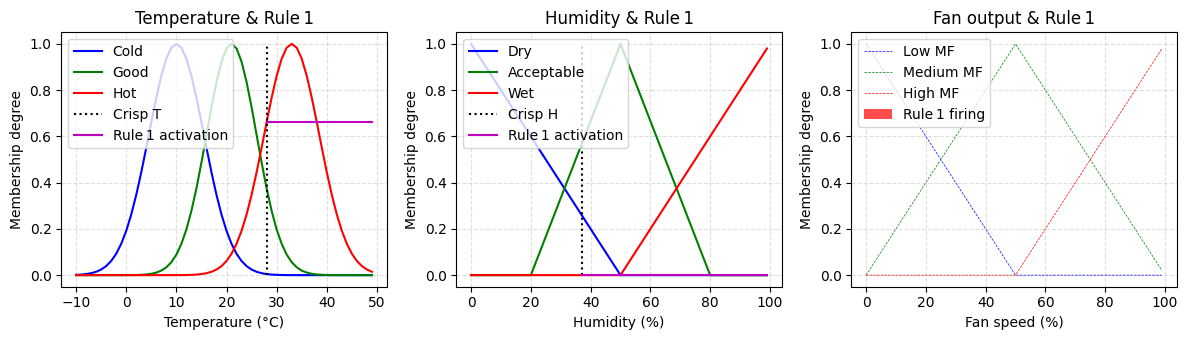

In [26]:


# Create a zero baseline for the fan‐activation fill
fan0 = np.zeros_like(x_fan)

# Prepare three side‐by‐side axes
fig, (ax_temp, ax_hum, ax_fan) = plt.subplots(1, 3, figsize=(12, 3.5))

# -------------------------------------------------------------------
# 1) Temperature fuzzy sets & Rule 1 activation
# -------------------------------------------------------------------
# Plot membership curves
ax_temp.plot(x_temp, temp_cold,  'b',  linewidth=1.5, label='Cold')
ax_temp.plot(x_temp, temp_good,  'g',  linewidth=1.5, label='Good')
ax_temp.plot(x_temp, temp_hot,   'r',  linewidth=1.5, label='Hot')

# Mark the crisp temperature T
ax_temp.plot([T, T], [0, 1], ':k', label='Crisp T')

# Show Rule 1 firing strength (Hot ∧ Wet) on the temperature axis
ax_temp.plot(
    [T, x_temp.max()],
    [temp_level_hot, temp_level_hot],
    '-m',
    linewidth=1.5,
    label='Rule 1 activation'
)

# Labels, title, legend, grid
ax_temp.set_xlabel('Temperature (°C)')
ax_temp.set_ylabel('Membership degree')
ax_temp.set_title('Temperature & Rule 1')
ax_temp.legend(loc='upper left', framealpha=0.8)
ax_temp.grid(True, ls='--', alpha=0.4)


# -------------------------------------------------------------------
# 2) Humidity fuzzy sets & Rule 1 activation
# -------------------------------------------------------------------
ax_hum.plot(x_humidity, humid_dry,         'b',  linewidth=1.5, label='Dry')
ax_hum.plot(x_humidity, humid_acceptable,  'g',  linewidth=1.5, label='Acceptable')
ax_hum.plot(x_humidity, humid_wet,         'r',  linewidth=1.5, label='Wet')

# Mark the crisp humidity H
ax_hum.plot([H, H], [0, 1], ':k', label='Crisp H')

# Show Rule 1 firing strength on the humidity axis
ax_hum.plot(
    [H, x_humidity.max()],
    [humid_level_wet, humid_level_wet],
    '-m',
    linewidth=1.5,
    label='Rule 1 activation'
)

ax_hum.set_xlabel('Humidity (%)')
ax_hum.set_ylabel('Membership degree')
ax_hum.set_title('Humidity & Rule 1')
ax_hum.legend(loc='upper left', framealpha=0.8)
ax_hum.grid(True, ls='--', alpha=0.4)


# -------------------------------------------------------------------
# 3) Fan‐speed output & Rule 1 activation
# -------------------------------------------------------------------
# Plot the underlying MFs
ax_fan.plot(x_fan, fan_lo, 'b--', linewidth=0.5, label='Low MF')
ax_fan.plot(x_fan, fan_md, 'g--', linewidth=0.5, label='Medium MF')
ax_fan.plot(x_fan, fan_hi, 'r--', linewidth=0.5, label='High MF')

# Shade the activation area for “High” from Rule 1
ax_fan.fill_between(
    x_fan,
    fan0,
    fan_activation_hi,
    facecolor='r',
    alpha=0.7,
    label='Rule 1 firing'
)

ax_fan.set_xlabel('Fan speed (%)')
ax_fan.set_ylabel('Membership degree')
ax_fan.set_title('Fan output & Rule 1')
ax_fan.legend(loc='upper left', framealpha=0.8)
ax_fan.grid(True, ls='--', alpha=0.4)

# Tidy up and display
plt.tight_layout()
plt.show()


## Rule 2  
**IF** Temperature is **Good** **AND** Humidity is **Acceptable**  
**THEN** Fan Speed is **Medium**

- **Temperature “Good” membership** = 0.38  
- **Humidity “Acceptable” membership** = 0.57  
- **Rule 2 firing strength** (minimum of antecedents) = min(0.38, 0.57) = **0.38**

---

*Interpretation:*  
Because both temperature is moderately “Good” and humidity is moderately “Acceptable,” Rule 2 fires at strength 0.38, contributing a “Medium” fan-speed activation at that level.

In [27]:
# One condition - no need of logic operator
alpha2 = humid_level_acceptable

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
# This finds the top of the fuzzy patch for medium fan
fan_activation_md = np.fmin(alpha2, fan_md)

print(f"{alpha2:.2f} will be projected over 'Medium' set of the fan speed")

0.57 will be projected over 'Medium' set of the fan speed


# Visualizing Fuzzy Rule 2 Activation

Below is a summary of how the same crisp inputs map into fuzzy memberships, and the resulting activation for Rule 2.






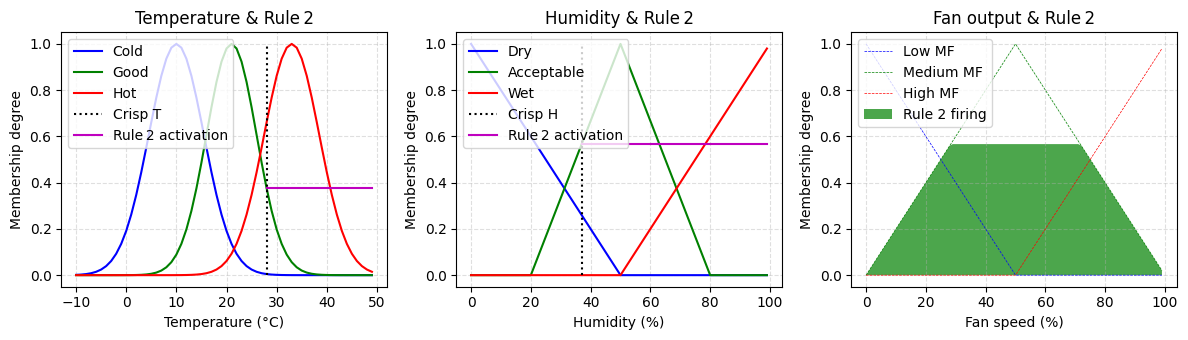

In [28]:

# Baseline for fan‐activation shading
fan0 = np.zeros_like(x_fan)

# Prepare a 1×3 grid of subplots
fig, (ax_temp, ax_hum, ax_fan) = plt.subplots(1, 3, figsize=(12, 3.5))

# -------------------------------------------------------------------
# 1) Temperature fuzzy sets & Rule 2 activation
# -------------------------------------------------------------------
# Plot all temperature MFs
ax_temp.plot(x_temp, temp_cold,  'b', linewidth=1.5, label='Cold')
ax_temp.plot(x_temp, temp_good,  'g', linewidth=1.5, label='Good')
ax_temp.plot(x_temp, temp_hot,   'r', linewidth=1.5, label='Hot')

# Mark crisp temperature T
ax_temp.plot([T, T], [0, 1], ':k', label='Crisp T')

# Show Rule 2 firing strength (Good ∧ Acceptable) on the temp axis
ax_temp.plot(
    [T, x_temp.max()],
    [temp_level_good, temp_level_good],
    '-m',
    linewidth=1.5,
    label='Rule 2 activation'
)

ax_temp.set_xlabel('Temperature (°C)')
ax_temp.set_ylabel('Membership degree')
ax_temp.set_title('Temperature & Rule 2')
ax_temp.legend(loc='upper left', framealpha=0.8)
ax_temp.grid(True, ls='--', alpha=0.4)


# -------------------------------------------------------------------
# 2) Humidity fuzzy sets & Rule 2 activation
# -------------------------------------------------------------------
ax_hum.plot(x_humidity, humid_dry,         'b', linewidth=1.5, label='Dry')
ax_hum.plot(x_humidity, humid_acceptable,  'g', linewidth=1.5, label='Acceptable')
ax_hum.plot(x_humidity, humid_wet,         'r', linewidth=1.5, label='Wet')

# Mark crisp humidity H
ax_hum.plot([H, H], [0, 1], ':k', label='Crisp H')

# Show Rule 2 firing strength on the humidity axis
ax_hum.plot(
    [H, x_humidity.max()],
    [humid_level_acceptable, humid_level_acceptable],
    '-m',
    linewidth=1.5,
    label='Rule 2 activation'
)

ax_hum.set_xlabel('Humidity (%)')
ax_hum.set_ylabel('Membership degree')
ax_hum.set_title('Humidity & Rule 2')
ax_hum.legend(loc='upper left', framealpha=0.8)
ax_hum.grid(True, ls='--', alpha=0.4)


# -------------------------------------------------------------------
# 3) Fan‐speed output & Rule 2 activation
# -------------------------------------------------------------------
# Underlying fan-speed MFs (dashed)
ax_fan.plot(x_fan, fan_lo, 'b--', linewidth=0.5, label='Low MF')
ax_fan.plot(x_fan, fan_md, 'g--', linewidth=0.5, label='Medium MF')
ax_fan.plot(x_fan, fan_hi, 'r--', linewidth=0.5, label='High MF')

# Shade the "Medium" activation area from Rule 2
ax_fan.fill_between(
    x_fan,
    fan0,
    fan_activation_md,
    facecolor='g',
    alpha=0.7,
    label='Rule 2 firing'
)

ax_fan.set_xlabel('Fan speed (%)')
ax_fan.set_ylabel('Membership degree')
ax_fan.set_title('Fan output & Rule 2')
ax_fan.legend(loc='upper left', framealpha=0.8)
ax_fan.grid(True, ls='--', alpha=0.4)

# Final layout and display
plt.tight_layout()
plt.show()


Rule 3:  
> **IF** Temperature is **Good** **OR** Humidity is **Dry**  
> **THEN** Fan Speed is **Low**

---

## 2. Rule 3 Firing Strength

- Temperature “Good” membership = 0.38  
- Humidity “Dry” membership = 0.26  
- **Firing strength** = max(0.38, 0.26) = **0.38**  

The rule clips the **Low** fan-speed MF at 0.38.

---

In [29]:
# The OR operator means we take the maximum of these two.
alpha3 = np.fmax(temp_level_good, humid_level_dry)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
# This finds the top of the fuzzy patch for low fan
fan_activation_lo = np.fmin(alpha3, fan_lo)

print(f"{alpha3:.2f} will be projected over 'Low' set of the fan speed")

0.38 will be projected over 'Low' set of the fan speed


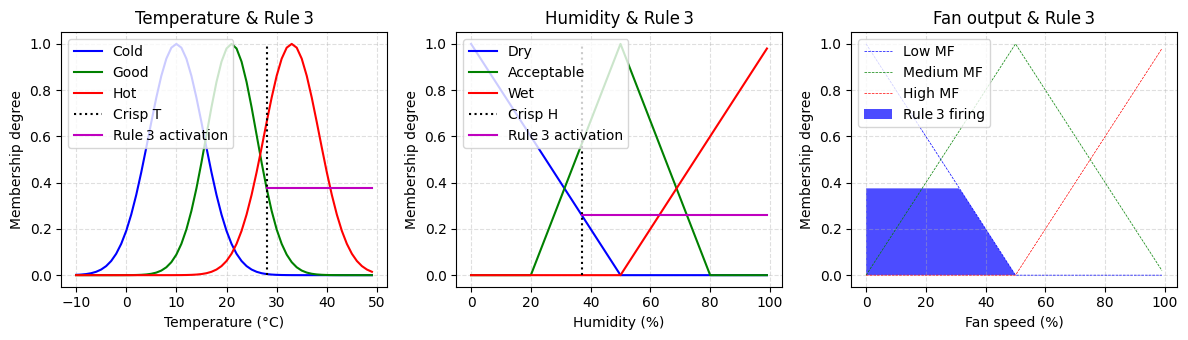

In [32]:
# 1) Zero baseline for shading
fan0 = np.zeros_like(x_fan)

# 2) Create three side-by-side plots
fig, (ax_temp, ax_hum, ax_fan) = plt.subplots(1, 3, figsize=(12, 3.5))

# --- Temperature & Rule 3 ---
ax_temp.plot(x_temp, temp_cold,  'b', linewidth=1.5, label='Cold')
ax_temp.plot(x_temp, temp_good,  'g', linewidth=1.5, label='Good')
ax_temp.plot(x_temp, temp_hot,   'r', linewidth=1.5, label='Hot')
ax_temp.plot([T, T], [0, 1],     ':k', linewidth=1.5, label='Crisp T')
# ← draw from T to the right edge
ax_temp.plot(
    [T, x_temp.max()],
    [temp_level_good, temp_level_good],
    '-m', linewidth=1.5, label='Rule 3 activation'
)
ax_temp.set_title('Temperature & Rule 3')
ax_temp.set_xlabel('Temperature (°C)')
ax_temp.set_ylabel('Membership degree')
ax_temp.legend(loc='upper left', framealpha=0.8)
ax_temp.grid(True, ls='--', alpha=0.4)

# --- Humidity & Rule 3 ---
ax_hum.plot(x_humidity, humid_dry,        'b', linewidth=1.5, label='Dry')
ax_hum.plot(x_humidity, humid_acceptable, 'g', linewidth=1.5, label='Acceptable')
ax_hum.plot(x_humidity, humid_wet,        'r', linewidth=1.5, label='Wet')
ax_hum.plot([H, H], [0, 1],             ':k', linewidth=1.5, label='Crisp H')
# ← draw from H to the right edge
ax_hum.plot(
    [H, x_humidity.max()],
    [humid_level_dry, humid_level_dry],
    '-m', linewidth=1.5, label='Rule 3 activation'
)
ax_hum.set_title('Humidity & Rule 3')
ax_hum.set_xlabel('Humidity (%)')
ax_hum.set_ylabel('Membership degree')
ax_hum.legend(loc='upper left', framealpha=0.8)
ax_hum.grid(True, ls='--', alpha=0.4)

# --- Fan-speed output & Rule 3 ---
ax_fan.plot(x_fan, fan_lo, 'b--', linewidth=0.5, label='Low MF')
ax_fan.plot(x_fan, fan_md, 'g--', linewidth=0.5, label='Medium MF')
ax_fan.plot(x_fan, fan_hi, 'r--', linewidth=0.5, label='High MF')
ax_fan.fill_between(
    x_fan,
    fan0,
    fan_activation_lo,
    facecolor='b',
    alpha=0.7,
    label='Rule 3 firing'
)
ax_fan.set_title('Fan output & Rule 3')
ax_fan.set_xlabel('Fan speed (%)')
ax_fan.set_ylabel('Membership degree')
ax_fan.legend(loc='upper left', framealpha=0.8)
ax_fan.grid(True, ls='--', alpha=0.4)

plt.tight_layout()
plt.show()


##### Aggregate rules output #####

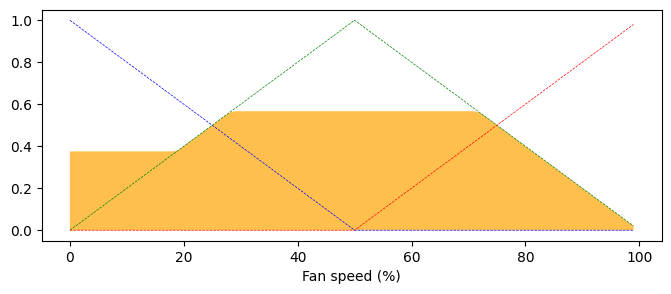

In [31]:
# Aggregate all three output membership functions together
beta = np.fmax(fan_activation_lo,
                    np.fmax(fan_activation_md, fan_activation_hi))

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_fan, fan_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_fan, fan_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_fan, fan_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_fan, fan0, beta, facecolor='Orange', alpha=0.7)
ax0.set_xlabel('Fan speed (%)')

plt.show()

## Defuzzification

After aggregating all rule outputs into the combined membership function **β**, we turn that shaded fuzzy region into a single crisp fan-speed value. The four most common defuzzification methods are:

| **Method**              | **Description**                                                                 |
|-------------------------|---------------------------------------------------------------------------------|
| **`centroid`**          | Computes the “center of gravity” of the area under β.                            |
| **`mom`** (Mean of Maxima) | Averages all _x_-values at which β reaches its maximum.                          |
| **`som`** (Smallest of Maxima) | Picks the smallest _x_ where β is maximal.                                      |
| **`lom`** (Largest of Maxima)  | Picks the largest _x_ where β is maximal.                                       |

---

In [33]:
# Calculate defuzzified result
fan_cog = fuzz.defuzz(x_fan, beta, 'centroid')
fan_mom = fuzz.defuzz(x_fan, beta, 'mom') # mean of max
fan_som = fuzz.defuzz(x_fan, beta, 'som') # small of max
fan_lom = fuzz.defuzz(x_fan, beta, 'lom') # large of max
# Visualize this
fan_cog_activation = fuzz.interp_membership(x_fan, beta, fan_cog)  # for plot
fan_mom_activation = fuzz.interp_membership(x_fan, beta, fan_mom)  # for plot
fan_som_activation = fuzz.interp_membership(x_fan, beta, fan_som)  # for plot
fan_lom_activation = fuzz.interp_membership(x_fan, beta, fan_lom)  # for plot

print(f"{fan_cog:.2f}[%] of the fan speed - centroid result")
print(f"{fan_mom:.2f}[%] of the fan speed - mean of max result")
print(f"{fan_som:.2f}[%] of the fan speed - small of max result")
print(f"{fan_lom:.2f}[%] of the fan speed - large of max result")

46.50[%] of the fan speed - centroid result
50.00[%] of the fan speed - mean of max result
29.00[%] of the fan speed - small of max result
71.00[%] of the fan speed - large of max result


##### Visualize fuzzy output #####

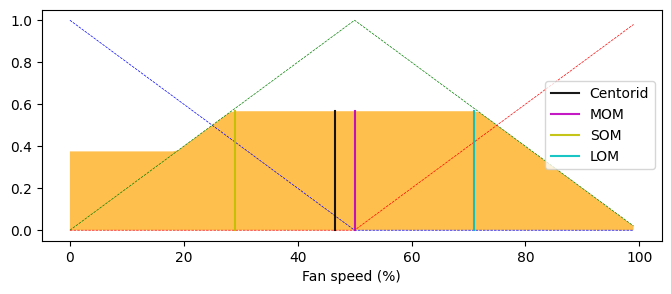

In [ ]:

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_fan, fan_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_fan, fan_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_fan, fan_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_fan, fan0, beta, facecolor='Orange', alpha=0.7)
ax0.plot([fan_cog, fan_cog], [0, fan_cog_activation], 'k', linewidth=1.5, alpha=0.9, label = 'Centorid')
ax0.plot([fan_mom, fan_mom], [0, fan_mom_activation], 'm', linewidth=1.5, alpha=0.9, label = 'MOM')
ax0.plot([fan_som, fan_som], [0, fan_som_activation], 'y', linewidth=1.5, alpha=0.9, label = 'SOM')
ax0.plot([fan_lom, fan_lom], [0, fan_lom_activation], 'c', linewidth=1.5, alpha=0.9, label = 'LOM')
ax0.set_xlabel('Fan speed (%)')
ax0.legend()

plt.show()

----------

## Summary ##

In this class we covered:

1. An overview of fuzzy control systems (briefly).
2. Designing a fuzzy control system for regulating fan speed using a fuzzy inference system based on three rules with multiple conditions.
3. Implementing the control system and visualizing the rules and final output using Python's skfuzzy library.

---


## Helpful and extra links ##

1. [Fuzzy control system using python skfuzzy example - 'The Tipping Problem'](https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem.html) 
2. [Fuzzy control systems - explained](https://www.youtube.com/watch?v=R9eN9CIkwxc)
---